In [1]:
import pandas as pd
import pickle

# Load processed data
df = pd.read_csv("/Users/unnatir/Desktop/ML/Food_Wastage_Prediction/data/processed/food_waste_clean.csv")

# Drop index column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Define target
y = df['quantity_wasted']

# Define features (same as training)
X = df.drop(columns=[
    'quantity_wasted',
    'waste_ratio',
    'waste_per_guest'
])

# Encode remaining categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Load trained model
with open("/Users/unnatir/Desktop/ML/Food_Wastage_Prediction/model/food_waste_model.pkl", "rb") as f:
    model = pickle.load(f)


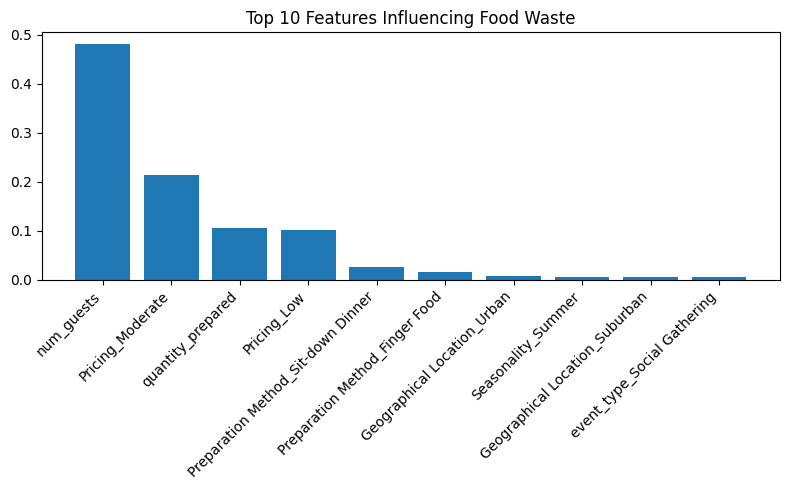

In [2]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), X.columns[indices][:10], rotation=45, ha='right')
plt.title("Top 10 Features Influencing Food Waste")
plt.tight_layout()
plt.show()